# Importing required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#  Data understanding along with Data Cleansing and Transformations

In [4]:
# loading the data 
df=pd.read_csv("bank-additional-full.csv")
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


## Dealing with structure of the data : Semicolon-separated Values
- **Problem:** The data is not in comma-separated values (CSV) format; it is separated by semicolons.
- **Solution:** Specify the delimiter as a semicolon when using pandas to read the CSV file.

In [6]:
#Reading using delimiter
df=pd.read_csv("bank-additional-full.csv",delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Handling Duplicates 
- **Problem:** Are any Duplicate values in the dataset ?
- **Solution:** Use the **drop_duplicates** function, keeping the first occurrence, as the first instance may be needed.

In [9]:
#checking for duplicates i the dataset
print('Number of duplicates in the dataset are:',df.duplicated().sum())
print('Total number of Rows:', df.shape[0])
print('Total number of Columns:', df.shape[1])

Number of duplicates in the dataset are: 12
Total number of Rows: 41188
Total number of Columns: 21


In [10]:
# dropping duplicates by keeping first instance
df.drop_duplicates(keep = 'first',inplace=True)
print('Number of duplicates in the dataset are:',df.duplicated().sum())
print('Total number of Rows:', df.shape[0])
print('Total number of Columns:', df.shape[1])

Number of duplicates in the dataset are: 0
Total number of Rows: 41176
Total number of Columns: 21


## Dealing with Unknown values
- **Problem:** There are no null values (NaN) in the dataset, but some columns contain unknown or ambiguous values.
- **Solution:** Address these unknown values by using mean, mode, median, or model-based approaches. Alternatively, if the number of unknown values is small, consider dropping them.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
#lets see in which columns we have this unknown values
for i in df.columns:
   x=df[i].value_counts()
   if 'unknown' in x:
       print('The ',"\033[1m" 'unknown' "\033[0m" ,'values in', "\033[1m",i, "\033[0m",'column are :',"\033[1m",x['unknown'],"\033[0m")

The  unknown values in  job  column are :  330 
The  unknown values in  marital  column are :  80 
The  unknown values in  education  column are :  1730 
The  unknown values in  default  column are :  8596 
The  unknown values in  housing  column are :  990 
The  unknown values in  loan  column are :  990 


In [15]:
# lets see how much volume these unknown values weight in those specific columns.
for i in df.columns:
    x=(df[i] != 'unknown').sum()
    y=(df[i] == 'unknown').sum()
    if x and y > 1 :
        print("\033[1m",i.upper(), "\033[0m")
        print('known values :', x)
        print('Uknown values :', y)
        print('percentage of unknown in that specific column :',"\033[1m",((y/(x+y))*100).round(2),'%',"\033[0m")

 JOB 
known values : 40846
Uknown values : 330
percentage of unknown in that specific column :  0.8 % 
 MARITAL 
known values : 41096
Uknown values : 80
percentage of unknown in that specific column :  0.19 % 
 EDUCATION 
known values : 39446
Uknown values : 1730
percentage of unknown in that specific column :  4.2 % 
 DEFAULT 
known values : 32580
Uknown values : 8596
percentage of unknown in that specific column :  20.88 % 
 HOUSING 
known values : 40186
Uknown values : 990
percentage of unknown in that specific column :  2.4 % 
 LOAN 
known values : 40186
Uknown values : 990
percentage of unknown in that specific column :  2.4 % 


In [16]:
df[['job','marital','education','default','housing','loan']].dtypes

job          object
marital      object
education    object
default      object
housing      object
loan         object
dtype: object

#### We can see that **Job, Marital, Education, Default, Housing and loan** has unknown values.

### Dropping the values
**Solution:** Since the unknown values in the **job** and **marital** columns are minimal compared to the known values, we can **drop** these **unknown** values due to their small proportion.


In [19]:
# dropping unknown values in job and marital
# marital
indices_marital = df[df['marital'] == 'unknown'].index
print(len(indices_marital))
df.drop(indices_marital,inplace=True)

# job
indices_job = df[df['job'] == 'unknown'].index
print(len(indices_job))
df.drop(indices_job,inplace=True)

80
321


In [20]:
df.shape

(40775, 21)

### Mode Imputation
**Solution:** For the remaining unknown values, we use **mode imputation**. Since the data is simple and the columns in question are **categorical**, we opt for mode rather than mean or median, which are suited for numerical data. We are not using a model-based approach due to the simplicity of the dataset.

**Note**: Imputation methods such as filling with mean, median, or mode often rely on identifying NaN values. If unknown values are not replaced with NaN,these methods may not correctly identify or handle them, leading to inaccurate imputation.

In [22]:
# repacing default,housing,loan,education with mode

# Replace 'unknown' with NaN
df.replace('unknown', np.nan, inplace=True)

In [23]:
# Impute missing values for categorical columns with the mode

# Making the list of values that need to be imputing
imputing_columns = ['education','default','housing','loan']
for col in imputing_columns:
    # Calculating the mode (most frequent value) for the current column
    mode_value = df[col].mode()[0]
    # Filling the missing values (NaN) in the current column with the mode value
    df[col].fillna(mode_value, inplace=True)

In [24]:
# checking if their are any unknown values
for i in df.columns:
    x=(df[i] == 'unknown').sum()
    if x > 1:
        print('we have Unknown values in',i,':',y)
    else:
        print(i,'has no unknown values')

age has no unknown values
job has no unknown values
marital has no unknown values
education has no unknown values
default has no unknown values
housing has no unknown values
loan has no unknown values
contact has no unknown values
month has no unknown values
day_of_week has no unknown values
duration has no unknown values
campaign has no unknown values
pdays has no unknown values
previous has no unknown values
poutcome has no unknown values
emp.var.rate has no unknown values
cons.price.idx has no unknown values
cons.conf.idx has no unknown values
euribor3m has no unknown values
nr.employed has no unknown values
y has no unknown values


## Dealing with Outliers
- **Problem:** Are there outliers in the dataset? Outliers can be identified using various methods, such as visualizations and statistical techniques. We will focus on visualizations because they provide an easy and intuitive way to detect outliers without added complexity.
- **Solution:** To handle outliers, we can use approaches like Capping (Winsorization),Transformations(Log), Remove (Dropping).

### Identifying Outliers
Since our dataset contains both numeric and categorical data, we can use the following methods to identify outliers:
- **Boxplot**: Suitable for identifying outliers in numeric data.
- **Frequency Analysis**: Useful for detecting outliers in categorical data by observing unusual or rare categories.


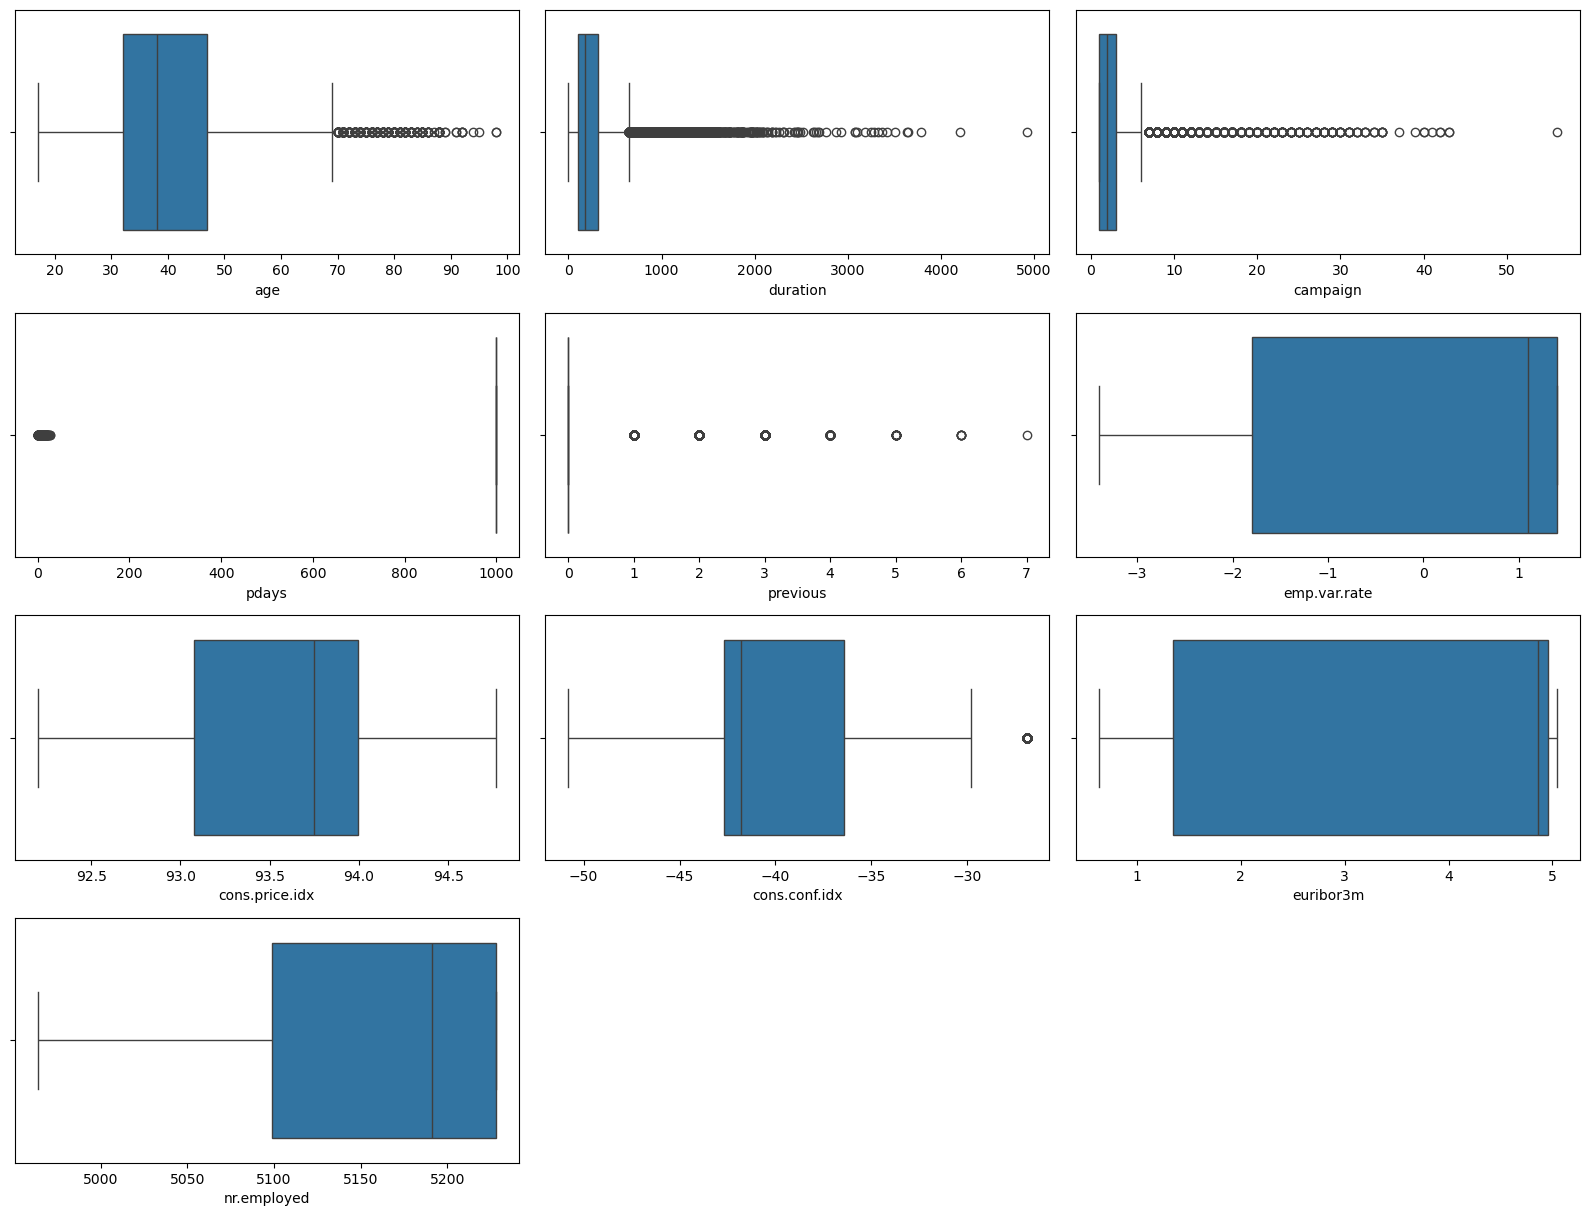

In [27]:
#Boxplots for numeric data

# Filtering  numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(16, 30))  

#plotting box plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 3, i)
    sns.boxplot(x=df[column])
plt.tight_layout() 
plt.show()

In [28]:
#Value counts for categorical data
# Filtering  categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(df[column].value_counts())
    print("\n")

job
admin.           10405
blue-collar       9239
technician        6727
services          3961
management        2921
retired           1713
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
Name: count, dtype: int64


marital
married     24687
single      11490
divorced     4598
Name: count, dtype: int64


education
university.degree      13687
high.school             9461
basic.9y                6006
professional.course     5222
basic.4y                4118
basic.6y                2263
illiterate                18
Name: count, dtype: int64


default
no     40772
yes        3
Name: count, dtype: int64


housing
yes    22355
no     18420
Name: count, dtype: int64


loan
no     34592
yes     6183
Name: count, dtype: int64


contact
cellular     25919
telephone    14856
Name: count, dtype: int64


month
may    13617
jul     7113
aug     6106
jun     5245
nov     4086
apr     2619
oct      706
sep      562
mar      541
dec 

#### From the analysis above, we can conclude that there are **no** outliers in the **categorical data**.However, potential outliers are **present** in the **numeric data**, particularly in the **'age', 'duration', 'campaign', 'pdays', and 'previous'** columns.


#### Understanding the Outliers
Analyze the identified outliers to determine the most appropriate methods for handling them. This step is crucial for choosing the right approach, whether it be capping, transformation, or removal.

In [31]:
df[['age','duration','campaign','pdays','previous']].describe()

,age,duration,campaign,pdays,previous
count,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000
mean,39.978541,258.360932,2.566401,962.714752,0.172925
std,10.401573,259.295917,2.768411,186.319804,0.494927
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


##### Age column
- As we can see, the age ranges from 17 to 98, which seems reasonable.Therefore, we don't need to treat outliers for age, and we won't drop any data points based on age.


##### Duration Column
- Since we are not considering 'duration' in our analysis, we can ignore outliers in this column.However, if you choose to include 'duration' later, please ensure to treat any outliers accordingly.


In [34]:
df['pdays'].value_counts()

pdays
999    39285
3        431
6        404
4        116
9         64
7         60
2         59
12        58
10        52
5         46
13        35
11        27
1         25
15        24
14        20
8         17
0         15
16        10
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

##### pdays Column
- As we can see, the value 999 appears in most of the rows, indicating that the client was not contacted previously.Removing these values doesn't make sense, so it's best to leave them as is.


In [36]:
df['previous'].value_counts() 

previous
0    35205
1     4522
2      740
3      214
4       70
5       18
6        5
7        1
Name: count, dtype: int64

##### Previous Column
- Although the numbers 4 to 7 appear rarely, we have included them in our analysis because they reflect valid client histories.Excluding these values might cause us to miss important details that could impact the success of our campaign.


In [38]:
df['campaign'].value_counts()

campaign
1     17444
2     10486
3      5294
4      2627
5      1586
6       966
7       622
8       394
9       277
10      222
11      176
12      124
13       89
14       69
17       57
16       50
15       49
18       31
20       30
19       26
21       23
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

##### Campaign Column
- For the 'campaign' column, we are applying capping (Winsorization) by limiting values to a maximum of 15. This helps in reducing the impact of extreme outliers.


In [40]:
df['campaign'] = np.clip(df['campaign'], a_min=None, a_max=15) # we can change the how many values we need based on outcome
df['campaign'].value_counts()

campaign
1     17444
2     10486
3      5294
4      2627
5      1586
6       966
7       622
15      399
8       394
9       277
10      222
11      176
12      124
13       89
14       69
Name: count, dtype: int64

In [41]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Dealing with imbalance of data 
- **Problem:** checking for imbalance data for target varibale
- **Solution:** To handle class imbalance, we can use resampling techniques like under 
sampling or oversampling, and evaluate model performance using metrics such as the F1
score

**Note:** Imbalance treatment is typically handled as part of the model training pipeline, not during initial data preprocessing.The main goal is to ensure that the model does not become biased toward the majority class, which is why these techniques are applied right before or during training.


In [43]:
#checking the imbalance using value counts
df['y'].value_counts(normalize=True)

y
no     0.887357
yes    0.112643
Name: proportion, dtype: float64

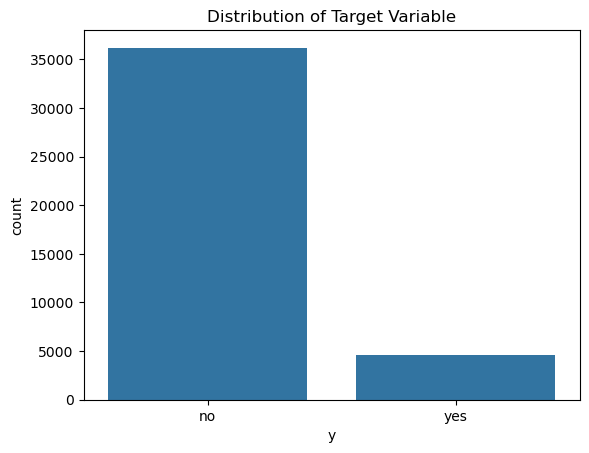

In [44]:
#plotting the counts graph 
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()

##### From above we can say that the target variable is imbalanced 

## Handling Skewness
- **Problem:** Just as with data imbalance, skewness in the data can affect model performance.
- **Solution:** Use transformations (e.g., log, square-root) or consider model sensitivity to skewness.

**Note:** Similar to imbalance treatment, we will address skewness only if it impacts model performance. Analyze the effect of skewness on the model outcome and apply transformations if necessary to improve results.



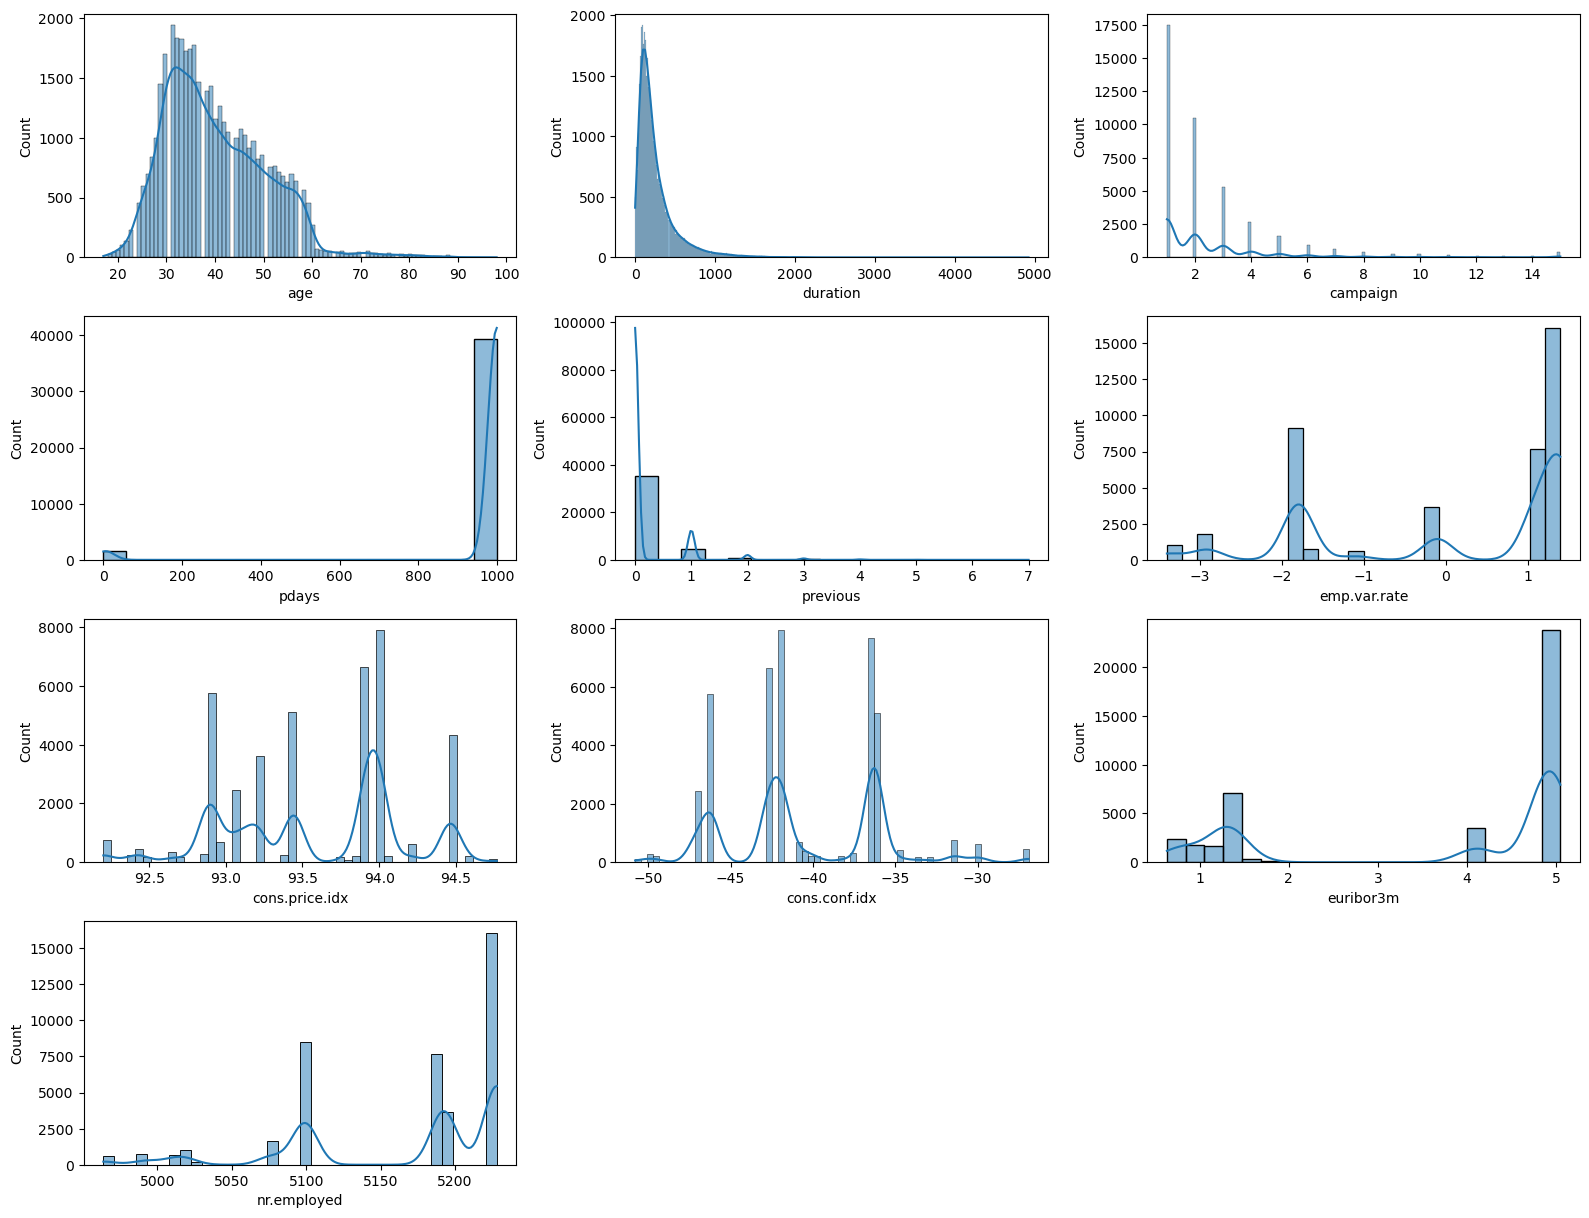

In [47]:
# Set up the figure for multiple boxplots
plt.figure(figsize=(16, 30))  # Adjust the figure size as needed

# Loop through the numeric columns and plot a boxplot for each
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 3, i)
    sns.histplot(df[column], kde=True)
    #plt.title(f"Histogram for '{column}'")
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [48]:
for i in numeric_columns:
    skewness = df[i].skew()
    if skewness > 0.5:
        print(i,f"{skewness:.2f} - Positive Skewness (Right-Skewed)")
    elif skewness < -0.5:
        print(i,f"{skewness:.2f} - Negative Skewness (Left-Skewed)")
    else:
        print(i,f"{skewness:.2f} - Approximately Symmetric")

age 0.79 - Positive Skewness (Right-Skewed)
duration 3.26 - Positive Skewness (Right-Skewed)
campaign 2.85 - Positive Skewness (Right-Skewed)
pdays -4.94 - Negative Skewness (Left-Skewed)
previous 3.84 - Positive Skewness (Right-Skewed)
emp.var.rate -0.72 - Negative Skewness (Left-Skewed)
cons.price.idx -0.23 - Approximately Symmetric
cons.conf.idx 0.31 - Approximately Symmetric
euribor3m -0.71 - Negative Skewness (Left-Skewed)
nr.employed -1.04 - Negative Skewness (Left-Skewed)


### Next Steps
We will apply additional transformations, such as converting categorical data into numerical data, after completing exploratory data analysis (EDA). Then we will prepare a final, cleaned dataset for training the models.